In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [10]:
import pandas_datareader.data as web

In [11]:
from datetime import datetime

In [15]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [16]:
end = datetime.now()
start = datetime (end.year-1,end.month,end.day)

In [17]:
for stock in tech_list:
    globals()[stock] = web.DataReader(stock,'iex',start,end)

In [19]:
AAPL.head()

,open,high,low,close,volume
date,,,,,
2018-02-06,152.5399,161.2984,151.7221,160.6186,68243838
2018-02-07,160.6728,160.9831,156.7157,157.1802,51608580
2018-02-08,157.9191,158.6186,152.7369,152.8551,54390516
2018-02-09,155.3777,156.1889,148.6213,154.7248,70672608
2018-02-12,156.7923,162.1242,155.8130,160.9569,60819539


In [20]:
AAPL.describe()

,open,high,low,close,volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,186.437115,188.382837,184.516454,186.480610,3.426895e+07
std,22.424071,22.481698,22.337596,22.398117,1.453103e+07
min,143.980000,145.720000,142.000000,142.190000,1.251979e+07
25%,170.285350,171.984650,168.157550,169.680550,2.373463e+07
50%,184.824600,185.976600,183.414500,185.013300,3.188288e+07
75%,206.194900,208.180950,205.018350,206.783500,4.076883e+07
max,229.977600,232.658200,228.981100,231.263100,9.624675e+07


In [21]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2018-02-06 to 2019-02-05
Data columns (total 5 columns):
open      251 non-null float64
high      251 non-null float64
low       251 non-null float64
close     251 non-null float64
volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8+ KB


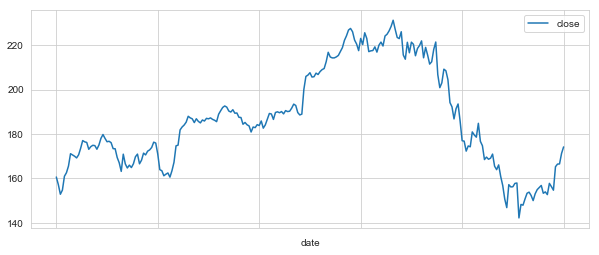

In [25]:
AAPL['close'].plot(legend=True,figsize=(10,4))

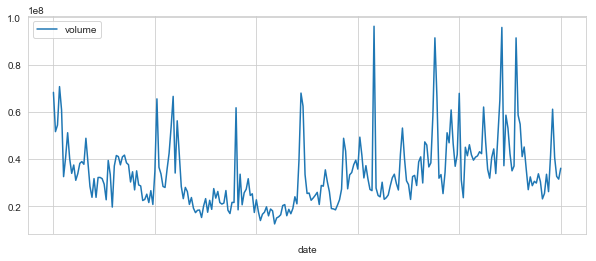

In [41]:
AAPL['volume'].plot(legend=True,figsize=(10,4))

In [47]:
#Moving Averages

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = pd.Series(AAPL['close']).rolling(window=ma).mean()

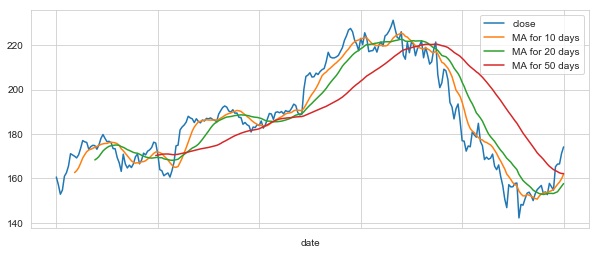

In [48]:
AAPL[['close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

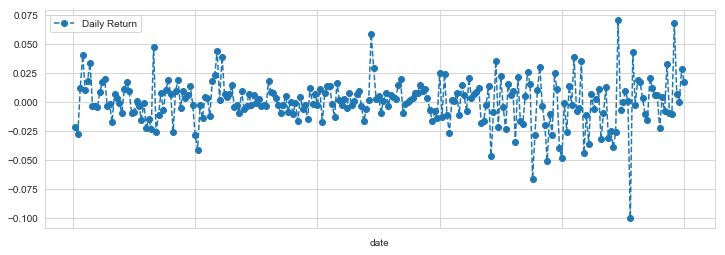

In [49]:
AAPL['Daily Return'] = AAPL['close'].pct_change()
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

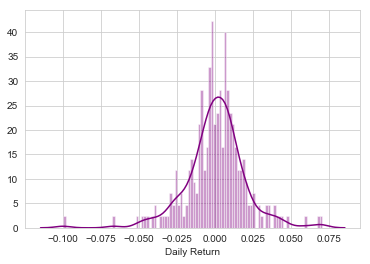

In [52]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [56]:
closing_df = web.DataReader(tech_list,'iex',start,end)['close']

In [57]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
date,,,,
2018-02-06,160.6186,1442.84,1080.60,89.7759
2018-02-07,157.1802,1416.78,1048.58,88.0851
2018-02-08,152.8551,1350.50,1001.52,83.5634
2018-02-09,154.7248,1339.60,1037.78,86.6795
2018-02-12,160.9569,1386.23,1051.94,87.6133


In [58]:
tech_rets = closing_df.pct_change()

In [59]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
date,,,,
2018-02-06,NaN,NaN,NaN,NaN
2018-02-07,-0.021407,-0.018062,-0.029632,-0.018834
2018-02-08,-0.027517,-0.046782,-0.044880,-0.051333
2018-02-09,0.012232,-0.008071,0.036205,0.037290
2018-02-12,0.040279,0.034809,0.013645,0.010773


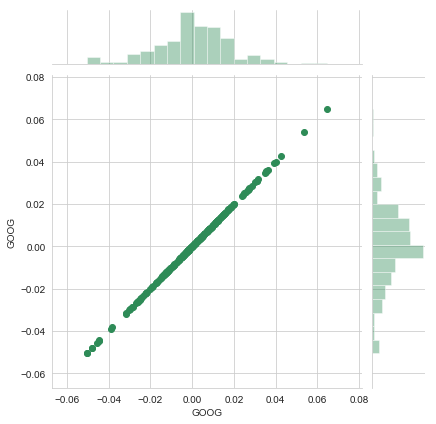

In [60]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

C:\Users\jakee\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


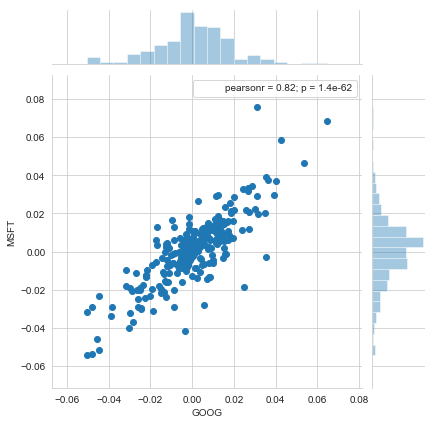

In [69]:
import numpy as np
from scipy import stats
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',stat_func=stats.pearsonr)

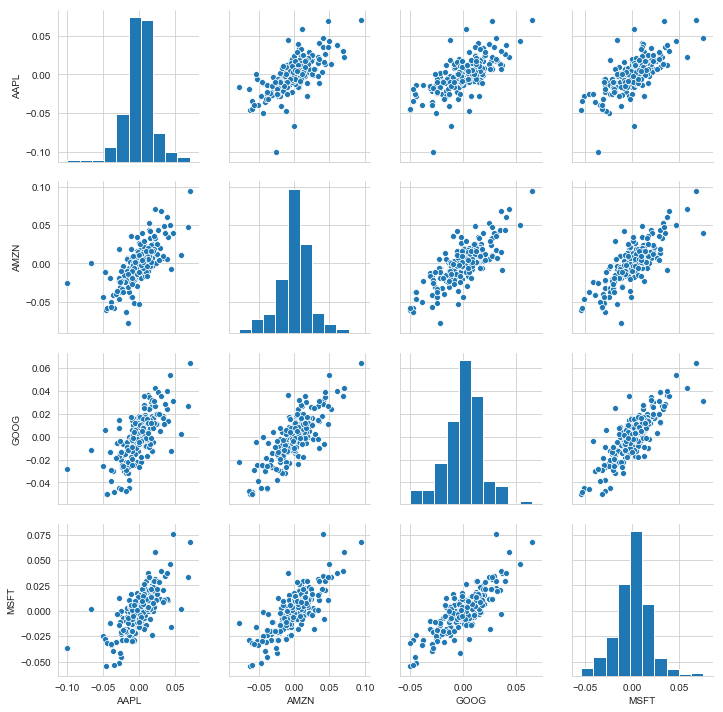

In [70]:
sns.pairplot(tech_rets.dropna())

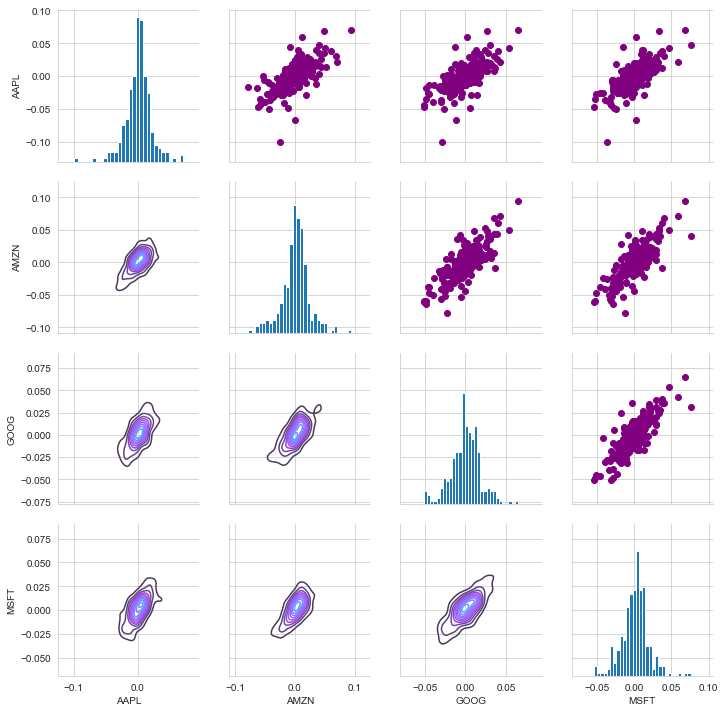

In [71]:
returns_fig = sns.PairGrid(tech_rets.dropna())


returns_fig.map_upper(plt.scatter,color='purple')


returns_fig.map_lower(sns.kdeplot,cmap='cool_d')


returns_fig.map_diag(plt.hist,bins=30)

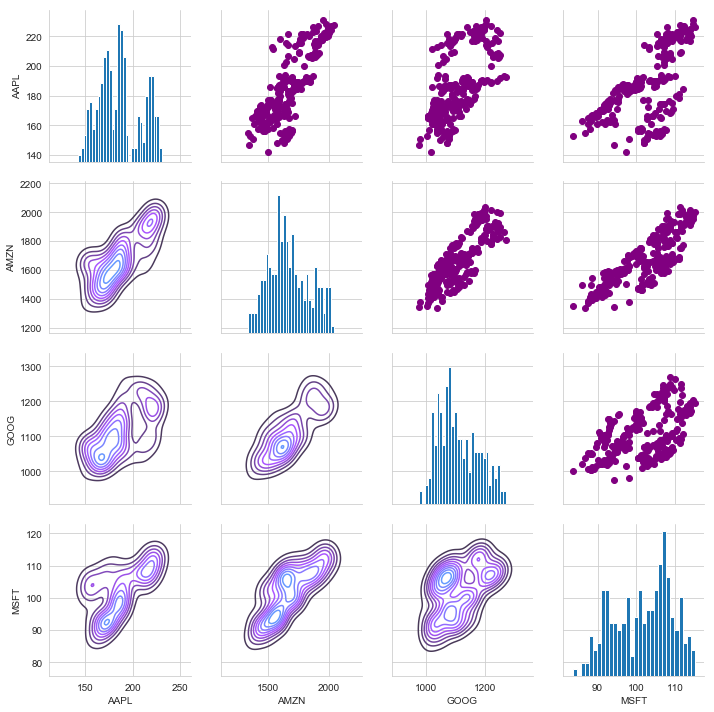

In [72]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

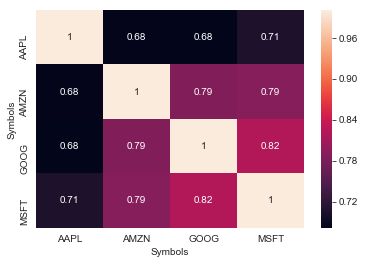

In [81]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

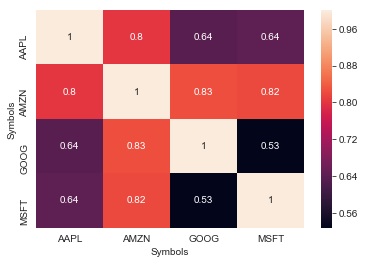

In [84]:
sns.heatmap(closing_df.corr(),annot=True)

In [85]:
#Risk Analysis

rets = tech_rets.dropna()

In [118]:
area = np.pi*20


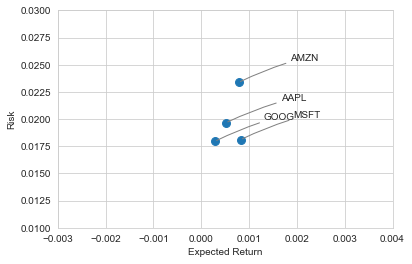

In [122]:
plt.scatter(rets.mean(),rets.std(),s=area)

plt.ylim([0.01,0.03])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (80, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0.05',color='grey'))

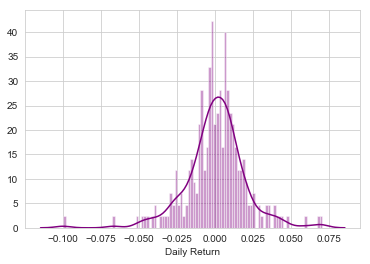

In [123]:
#Value at risk
    #Bootstrap
    
sns.distplot(AAPL['Daily Return'].dropna(),bins =100,color='purple')

In [124]:
rets['AAPL'].quantile(0.05)

-0.029789922227941024

In [125]:
    #Monte Carlo

days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [126]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale= sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] +shock[x]))
    return price

In [127]:
GOOG.head()

,open,high,low,close,volume
date,,,,,
2018-02-06,1027.18,1081.71,1023.14,1080.60,3447956
2018-02-07,1081.54,1081.78,1048.26,1048.58,2369232
2018-02-08,1055.41,1058.62,1000.66,1001.52,2859136
2018-02-09,1017.25,1043.97,992.56,1037.78,3505862
2018-02-12,1048.00,1061.50,1040.93,1051.94,2057718


Text(0.5, 1.0, 'Monte Carlo Analysis Google')

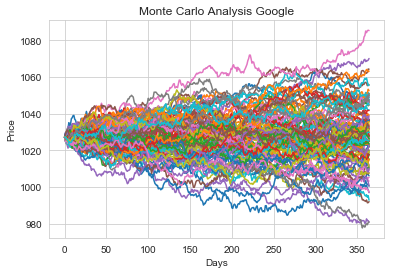

In [128]:
start_price = 1027.18
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis Google')

In [130]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

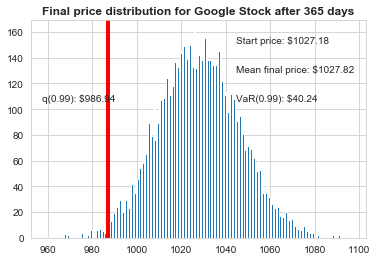

In [131]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [ ]:
#1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

#2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

#3.) Look further into correlatino of two stocks and see if that gives you any insight into future possible stock prices.